<a href="https://colab.research.google.com/github/verydwisetiawa03/Text_Preprocessing_NLP/blob/main/text_Processing_In_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text Pre Processing dalam Teknik Pengolahan Data Teks**


## **Natural Language Toolkit (NLTK)**

In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Dokumentasi lengkap dari NLTK dapat anda baca [disini](https://www.nltk.org).

## Python Sastrawi (Stemming Bahasa Indonesia)
Python Sastrawi adalah pengembangan dari proyek PHP Sastrawi. Python Sastrawi merupakan library sederhana yang dapat mengubah kata berimbuhan bahasa Indonesia menjadi bentuk dasarnya. Sastrawi juga dapat diinstal melalui “pip”.

**Output:**

```
 This is formatted as code
```



In [ ]:
!pip install PySastrawi

In [4]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemming process
sentence = 'Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan'
output   = stemmer.stem(sentence)

print(output)

ekonomi indonesia sedang dalam tumbuh yang bangga


# **1. Case folding**

## **Mengubah text menjadi lowercase**

In [5]:
kalimat = "Berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia."
lower_case = kalimat.lower()
print(lower_case)

berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah korea selatan, jepang, singapura, hong kong, dan finlandia.


## **Menghapus angka**

In [6]:
import re # impor modul regular expression
kalimat = "Berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia."
hasil = re.sub(r"\d+", "", kalimat)
print(hasil)

Berikut ini adalah  negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia.


## **Menghapus tanda baca**

In [7]:
import string
kalimat = "Ini &adalah [contoh] kalimat? {dengan} tanda. baca?!!"
hasil = kalimat.translate(str.maketrans("","", string.punctuation))
print(hasil)

Ini adalah contoh kalimat dengan tanda baca


## **Menghapus whitepace (karakter kosong)**

In [8]:
kalimat = " \t ini kalimat contoh\t "
hasil = kalimat.strip()
print(hasil)

ini kalimat contoh


# **2. Tokenizing**

In [9]:
kalimat = "rumah idaman adalah rumah yang bersih"
pisah = kalimat.split()
print(pisah)

['rumah', 'idaman', 'adalah', 'rumah', 'yang', 'bersih']


## **Tokenizing kata**
Sebuah kalimat atau data dapat dipisah menjadi kata-kata dengan kelas word_tokenize() pada modul NLTK.

In [15]:
# impor word_tokenize dari modul nltk
from nltk.tokenize import word_tokenize 
 
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online."
 
tokens = nltk.tokenize.word_tokenize(kalimat.translate(str.maketrans('','',string.punctuation)).lower())
print(tokens)

['andi', 'kerap', 'melakukan', 'transaksi', 'rutin', 'secara', 'daring', 'atau', 'online']


In [16]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()
 
tokens = nltk.tokenize.word_tokenize(kalimat)
kemunculan = nltk.FreqDist(tokens)
print(kemunculan.most_common())

[('andi', 2), ('online', 2), ('kerap', 1), ('melakukan', 1), ('transaksi', 1), ('rutin', 1), ('secara', 1), ('daring', 1), ('atau', 1), ('menurut', 1), ('belanja', 1), ('lebih', 1), ('praktis', 1), ('murah', 1)]


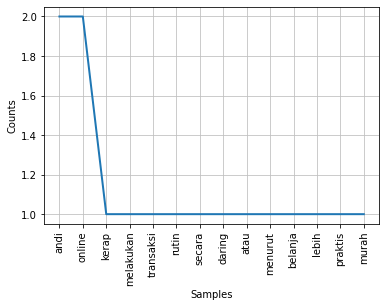

In [17]:
import matplotlib.pyplot as plt
kemunculan.plot(30,cumulative=False)
plt.show()

## **Tokenizing kalimat**
Prinsip yang sama dapat diterapkan untuk memisahkan kalimat pada paragraf. Anda dapat menggunkan kelas sent_tokenize() pada modul NLTK. Saya telah menambahkan kalimat pada contoh seperti dibawah ini :

In [18]:
# impor sent_tokenize dari modul nltk
from nltk.tokenize import sent_tokenize
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
 
tokens = nltk.tokenize.sent_tokenize(kalimat)
print(tokens)

['Andi kerap melakukan transaksi rutin secara daring atau online.', 'Menurut Andi belanja online lebih praktis & murah.']


# **3. Filtering (Stopword Removal)**
Filtering adalah tahap mengambil kata-kata penting dari hasil token dengan menggunakan algoritma stoplist (membuang kata kurang penting) atau wordlist (menyimpan kata penting).

## **Filtering dengan NLTK**

In [21]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
 
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()
 
tokens = word_tokenize(kalimat)
listStopword =  set(stopwords.words('indonesian'))
 
removed = []
for t in tokens:
    if t not in listStopword:
        removed.append(t)
 
print(removed)

['andi', 'kerap', 'transaksi', 'rutin', 'daring', 'online', 'andi', 'belanja', 'online', 'praktis', 'murah']


## **Filtering dengan sastrawi**
Selain untuk stemming, library Sastrawi juga mendukung proses filtering. Kita dapat menggunakan stopWordRemoverFactory dari modul sastrawi.

In [22]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['a', 'ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'arti', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'b', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagainamakah', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasannya', 'bahwasanya', 'baik', 'baiklah', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumla

In [23]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()
stop = stopword.remove(kalimat)
tokens = nltk.tokenize.word_tokenize(stop)
print(tokens)

['andi', 'kerap', 'transaksi', 'rutin', 'daring', 'online', 'andi', 'belanja', 'online', 'praktis', 'murah']


Kita dapat menambah atau mengurangi kata pada daftar stopword sesuai dengan kebutuhan analisa. Pada dasarnya daftar stopword pada library Sastrawi tersimpan di dalam list yang anda lihat disini. Jadi sebenarnya kita tinggal mengubah daftar pada list tersebut. Tetapi hal tersebut bisa menjadi permasalahan apabila pada suatu kasus kita diharuskan menambahkan stopword secara dinamis.

Library Sastrawi dapat mengatasi permasalahan tersebut, perhatikan kode dibawah ini :

In [24]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from nltk.tokenize import word_tokenize 
 

stop_factory = StopWordRemoverFactory().get_stop_words() #load defaul stopword
more_stopword = ['daring', 'online'] #menambahkan stopword
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()
data = stop_factory + more_stopword #menggabungkan stopword
 
dictionary = ArrayDictionary(data)
str = StopWordRemover(dictionary)
tokens = nltk.tokenize.word_tokenize(str.remove(kalimat))
 
print(tokens)

['andi', 'kerap', 'transaksi', 'rutin', 'andi', 'belanja', 'praktis', 'murah']


## **Stemming dengan NLTK (bahasa inggris)**

In [25]:
from nltk.stem import PorterStemmer 
   
ps = PorterStemmer() 
  
kata = ["program", "programs", "programer", "programing", "programers"] 
  
for k in kata: 
    print(k, " : ", ps.stem(k))

program  :  program
programs  :  program
programer  :  program
programing  :  program
programers  :  program


## **Stemming bahasa indonesia menggunakan Python Sastrawi**

In [26]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
 
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
hasil = stemmer.stem(kalimat)
print(hasil)

andi kerap laku transaksi rutin cara daring atau online turut andi belanja online lebih praktis murah
